# **V6 on Real Datatest**

In [ ]:
import sys
import os
current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))

from utils.wrapper import YOLOAPIWrappper
from utils.pipeline import CPPipeline

### **Additive**

In [ ]:
v6 = "../utils/v6/bestv6.onnx"
yolov6_detector_real = YOLOAPIWrappper(v6,file_path='calibv6_real_a.pickle', conf_thres=0.7, iou_thres=0.5)
pipev6_real = CPPipeline(yolov6_detector_real, test_set='test_real', method='additive')

In [4]:
X_train, y_train, labels_train= pipev6_real.extract_yolo_dataset()
X_train, X_val, y_train, y_val, labels_train, labels_val = pipev6_real.calibration_and_val(X_train, y_train, labels_train)
conformal_predictor= pipev6_real.pipeline( X_train=X_train, y_train= y_train, labels_train= labels_train)

Predictions: [[2679.93237305  332.45111084 3574.91137695  935.21417236]
 [1958.61572266 1099.95751953 2180.421875   1258.89770508]
 [2148.41845703  767.54229736 2219.60058594  867.94696045]
 [2589.78662109  546.10931396 2626.43164062  597.48675537]
 [ 813.14764404  345.51339722  842.05218506  389.91952515]
 [2347.13183594  610.63330078 2651.07861328  792.33312988]
 [1835.89550781  870.94299316 2198.9387207  1058.25183105]
 [2122.62939453  965.18444824 2281.68408203 1086.46789551]
 [1500.65429688  953.10479736 1597.20678711 1048.84082031]
 [2487.78515625  680.63409424 2537.58837891  752.78607178]
 [1734.22998047  924.94787598 1872.59375    1035.5012207 ]
 [1646.66540527  967.32421875 1689.60925293 1027.8581543 ]
 [2190.09594727  543.58508301 2353.75268555  690.45825195]
 [2485.80249023  530.00170898 2657.64038086  660.71142578]
 [2260.46264648  639.28137207 2371.85229492  750.14916992]
 [1916.95788574  858.54846191 2227.85253906 1026.3338623 ]
 [2915.95776367  793.55358887 3226.45141602

Marginal coverage: 0.0
Average area: 15623.66015625


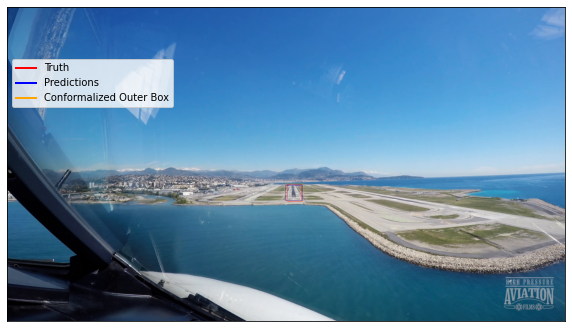

In [5]:
pipev6_real.infer_eval_single_image(
    conformal_predictor, 
    X_val[5],  # Image path at index 5
    y_val[5],  # Ground truth bounding boxes at index 5
    labels_val[5],  # Labels at index 5
    None  
)

In [6]:
y_pred_val, y_true_val, box_outer_val, images_val = pipev6_real.infer_eval_all(X_val, y_val, labels_val, conformal_predictor, visualize = False)

No detections in image /home/aws_install/data/yolo_database/images/test_real/mg7v0EMfJ74_ZBAA47.png
No detections in image /home/aws_install/data/yolo_database/images/test_real/3VrwyzGRCCc_LGKR19.png
No detections in image /home/aws_install/data/yolo_database/images/test_real/DSHCxCMrNAg_LGAV15.png
No detections in image /home/aws_install/data/yolo_database/images/test_real/Zhh8FlU-LAI_SAEZ24.png
No detections in image /home/aws_install/data/yolo_database/images/test_real/x3B0rnjW9fo_GCRR12.png
Average area of prediction intervals: 66671.7578125
Average length of prediction intervals: 258.208740234375
Number of images without predictions: 5
Number of images with predictions: 16
Number of images: 21
Marginal coverage: 0.4375
